# Class exercise: Ice cream cone

![](https://oit.tudelft.nl/CME4501/2024/_images/ice_cone.png)

We want to minimize the surface area of a cone, while not making the gap on the top too big (in terms of area).

Let’s define this as a multi-objective optimization problem with
1. the first objective to minimize the ice cream cone area $\pi r \sqrt{r^2+h^2}$
2. the second objective to minimize the ice cream cone area + the area of the gap $\pi r \sqrt{r^2+h^2} + \pi r^2$.

The total volume inside the cone must be at least 200.

Find the pareto front using normalized objective functions


## Model
Write out the model of this problem.

$$
\underset{r,h}{\mathop{\min }} \left(\delta_{Area} \cdot \cfrac{Area\left(r,h\right)-\min_{r,h} Area\left(r,h\right)}{\max_{r,h} Area\left(r,h\right) - \min_{r,h} Area\left(r,h\right)} + \delta_{Total} \cdot \cfrac{Total\left(r,h\right)-\min_{r,h} Total\left(r,h\right)}{\max_{r,h} Total\left(r,h\right) - \min_{r,h} Total\left(r,h\right)} \right)
$$

$$
\text{with } Area\left(r,h\right) = \pi r \sqrt{r^2+h^2} \\
\text{and } Total\left(r,h\right) = Area\left(r,h\right) + \cfrac{4}{3}\pi r^2 \\
\text{such that} \cfrac{1}{3}\pi r^2 h
$$

The minimum and maximum $Area$ and $Gap$ could be find by solving two single-objective problems:

$$
\underset{r,h}{\mathop{\min }} \pi r \sqrt{r^2+h^2} \\ 
\text{such that }  \cfrac{1}{3}\pi r^2 h \ge 200
$$

In [1]:
import scipy as sp 
import numpy as np

In [2]:
def Area(x):
    return np.pi* x[0] * np.sqrt(x[0]**2 + x[1]**2)
def Total(x):
    return np.pi* x[0] * np.sqrt(x[0]**2 + x[1]**2) + 4/3 * np.pi*x[0]**2

x0 = np.array([5,10])
def nonlinconfun(x):
    c = np.pi / 3 * x[0]**2 * x[1]
    return c

cons = sp.optimize.NonlinearConstraint(nonlinconfun, 200, np.inf)

bounds = [[0, np.inf],
          [0, np.inf]]

In [3]:
result = sp.optimize.minimize(fun = Area, x0 = x0, bounds = bounds, constraints = cons)
print(result)
print(Area(result.x))
print(Total(result.x))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 143.23025086897755
       x: [ 5.131e+00  7.256e+00]
     nit: 6
     jac: [ 3.722e+01  1.316e+01]
    nfev: 18
    njev: 6
143.23025086897755
253.48896806009228


$$
\underset{r,h}{\mathop{\min }} \cfrac{4}{3}\pi r^3 \\ 
\text{such that }\cfrac{1}{3}\pi r^2 h \ge 200
$$

In [4]:
result = sp.optimize.minimize(fun = Total, x0 = x0, bounds = bounds, constraints = cons)
print(result)
print(Area(result.x))
print(Total(result.x))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 224.73872628150949
       x: [ 3.840e+00  1.296e+01]
     nit: 10
     jac: [ 7.804e+01  1.157e+01]
    nfev: 27
    njev: 9
162.98691601464716
224.73872628150949


Leading to:

- $\min_{r,h} Area\left(r,h\right) \approx 143 $
- $\max_{r,h} Area\left(r,h\right) \approx 162 $ 
- $\min_{r,h} Total\left(r,h\right) \approx 224 $
- $\max_{r,h} Total\left(r,h\right) \approx 253 $

## Method
Now let's solve this problem using an optimization method.

In [5]:
import scipy as sp 
import numpy as np

In [6]:
def weighted_obj_pareto(x):
    return delta_Area * ( Area(x) -143) / ( 162 - 143) + delta_Total * ( Total(x) - 224) / ( 253 - 224)

In [8]:
x_pareto_opt =[]
delta_Area_list = np.linspace(0,1,101)
delta_Area_opt = []
delta_Total_list = 1 - delta_Area_list
delta_Total_opt = []
for i in range(101):
    delta_Area = delta_Area_list[i]
    delta_Total = delta_Total_list[i]
    result_i = sp.optimize.minimize(fun = weighted_obj_pareto,x0=x0,bounds=bounds, constraints = cons)
    if result_i.success:
        x_pareto_opt.append(result_i.x)
        delta_Area_opt.append(delta_Area)
        delta_Total_opt.append(delta_Total)
    else:
        print(result_i.message)

In [9]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

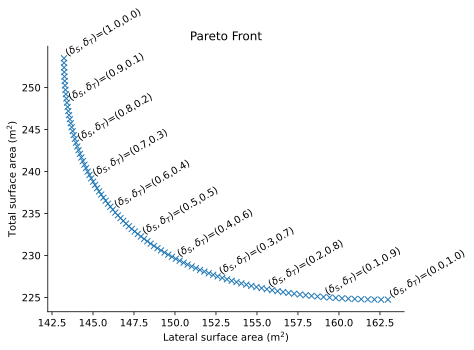

In [11]:
Area_pareto_opt = []
Total_pareto_opt = []
for i in range(len(x_pareto_opt)):
    Area_pareto_opt.append(Area(x_pareto_opt[i]))
    Total_pareto_opt.append(Total(x_pareto_opt[i]))

plt.figure()
plt.plot(Area_pareto_opt,Total_pareto_opt,'x')
for i in range(len(x_pareto_opt)):
    if i%10 == 0:
        plt.annotate(f"($\delta_S,\delta_T$)=({round(delta_Area_opt[i],1)},{round(delta_Total_opt[i],1)})", (Area_pareto_opt[i], Total_pareto_opt[i]), ha='left',va = 'bottom',rotation=30)
plt.xlabel('Lateral surface area (m$^2$)')
plt.ylabel('Total surface area (m$^2$)')
plt.title('Pareto Front')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')